# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Analisis para Interconect (Telecom/Prevencion de Churn)

## Descripcion del problema

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. 
Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

## Inicializacion

### Carga de librerias

In [292]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.utils import shuffle

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns


#from sklearn.datasets import make_classification


### Variables

In [293]:
validation_size = 0.25

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Buena selección y organización de librerías, cubriendo desde la manipulación de datos hasta el modelado y visualización. Una base sólida para el desarrollo del proyecto.</div>


## Funciones

In [294]:
"""
 Analiza si el customerID se encuentra mas de una vez en el data set lo que implicaría que es una relacion 1:n
"""
def analizaDatosLlave(df):
    customer_counts = df['customerID'].value_counts()
    duplicate_ids = customer_counts[customer_counts > 1].index.tolist()
    
    print("customerIDs que aparecen más de una vez:", duplicate_ids)
    print("-" * 30)

In [295]:

def generaGraficaCorr(data):
    # Graficando la correlacion entre variables numericas Posterior a la estandarizacion 
    corr = data.corr()  # Calculate the correlation matrix
    sns.heatmap(corr, annot=False, cmap='coolwarm')  # Create a heatmap
    plt.show()

In [296]:
def displayClassFrequency(y_train):
    class_frequency = y_train.value_counts(normalize=True)
    print("Normalized Class Frequency:")
    print(class_frequency)
    class_frequency.plot(kind='bar')

In [297]:
# A function to generate oversampling
def generate_oversamples(features, target, nrepeat):

    if (target[target == 0].count()<target[target == 1].count()):
        target_minority_class = target[target == 0]
        target_majority_class = target[target == 1]
        features_minority_class = features[target == 0]
        features_majority_class = features[target == 1]
    else:
        target_minority_class = target[target == 1]
        target_majority_class = target[target == 0]
        features_minority_class = features[target == 1]
        features_majority_class = features[target == 0]

    diff = 0
    if(nrepeat==0):
        nrepeat = int(target_majority_class.count()/target_minority_class.count())
        diff = target_majority_class.count() % target_minority_class.count()

    features_upsampled = pd.concat(
        [features_majority_class] + 
        [features_minority_class] * nrepeat 
    )
    
    target_upsampled = pd.concat(
        [target_majority_class] + 
        [target_minority_class] * nrepeat 
    )

    if diff>0:
        features_upsampled = pd.concat(
            [features_upsampled] + [features_minority_class.sample(diff, random_state=12345)]
        )
        target_upsampled = pd.concat(
            [target_upsampled] + [target_minority_class.sample(diff, random_state=12345)]
        )
        

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [298]:
# A function to generate a undersampling
def undersample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    if(target_zeros.count()>target_ones.count()):
        features_downsampled = pd.concat(
            [features_zeros.sample(frac=fraction, random_state=12345)]+[features_ones]
        )
        target_downsampled = pd.concat(
            [target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones]
        )
    else:
        features_downsampled = pd.concat(
            [features_ones.sample(frac=fraction, random_state=12345)]+[features_zeros]
        )
        target_downsampled = pd.concat(
            [features_ones.sample(frac=fraction, random_state=12345)]+[features_zeros]
        )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [299]:
def selectBestModel(features_train, target_train, strategy_label):
    best_score = 0
    the_best_model = {}
    for model_name, model in models.items():
        model_grid_params = grid_params[model_name]
        search = GridSearchCV(model,
                              #scoring='f1',
                              scoring='roc_auc',
                              param_grid=model_grid_params,
                              cv=5,
                              n_jobs=-1)
        search.fit(features_train, target_train)

        if search.best_score_ > best_score:
            the_best_model["strategy_label"] = strategy_label
            the_best_model["best_estimator"] = search.best_estimator_
            the_best_model["best_score"] = search.best_score_
            the_best_model["best_params"] = search.best_params_
            best_score = search.best_score_

    return the_best_model

In [300]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        
        
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buena implementación de funciones clave para el análisis y evaluación de modelos, con una estructura clara que cubre desde la exploración de datos hasta métricas avanzadas de desempeño.</div>


## Carga de datos

In [301]:
df_contract = pd.read_csv("/datasets/final_provider/contract.csv")
df_personal = pd.read_csv("/datasets/final_provider/personal.csv")
df_internet = pd.read_csv("/datasets/final_provider/internet.csv")
df_phone = pd.read_csv("/datasets/final_provider/phone.csv")

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Correcta carga de los datasets necesarios, estableciendo una base ordenada para el análisis posterior.</div>


## Analisis Exploratorio de Datos (EDA)

### Contracts (dataset)

In [302]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [303]:
df_contract.sample(15)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1483,0743-HNPFG,2015-11-01,No,One year,Yes,Credit card (automatic),69.75,3562.5
4315,9019-QVLZD,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,79.55,79.55
2181,1136-XGEQU,2015-12-01,No,One year,Yes,Credit card (automatic),84.15,4164.4
1876,3946-JEWRQ,2016-03-01,No,One year,Yes,Credit card (automatic),95.20,4563
2817,0936-NQLJU,2016-09-01,No,Two year,No,Credit card (automatic),20.65,875.55
1705,4918-FYJNT,2015-07-01,No,Month-to-month,No,Electronic check,90.45,5044.8
5270,6682-QJDGB,2016-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,55.25,2139.2
3779,8631-NBHFZ,2014-06-01,2019-12-01 00:00:00,Two year,No,Credit card (automatic),79.40,5154.6
1085,4441-NIHPT,2018-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,74.30,940.35
3737,8601-QACRS,2019-07-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,50.60,249.95


In [304]:
df_contract.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 495.2+ KB


In [305]:
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [306]:
df_contract["BeginDate"].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [307]:
df_contract[df_contract["BeginDate"]>="2020-01-01"]["BeginDate"].value_counts()

2020-01-01    233
2020-02-01     11
Name: BeginDate, dtype: int64

In [308]:
df_contract[df_contract["EndDate"]>="2020-01-01"]["EndDate"].value_counts()

No                     5174
2020-01-01 00:00:00     460
Name: EndDate, dtype: int64

In [309]:
print(df_contract['Type'].sort_values().unique())
print(df_contract['PaperlessBilling'].sort_values().unique())
print(df_contract['PaymentMethod'].sort_values().unique())
print(df_contract['EndDate'].sort_values().unique())

['Month-to-month' 'One year' 'Two year']
['No' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['2019-10-01 00:00:00' '2019-11-01 00:00:00' '2019-12-01 00:00:00'
 '2020-01-01 00:00:00' 'No']


In [310]:
# Convertir la serie a numérica con manejo de errores
s_numeric = pd.to_numeric(df_contract["TotalCharges"], errors='coerce')

# Verificar si hay valores NaN (no numéricos)
has_non_numeric = s_numeric.isna().any()

print("\n¿Contiene la serie valores no numéricos (NaN)?", has_non_numeric)


¿Contiene la serie valores no numéricos (NaN)? True


In [311]:
df_contract[s_numeric.isna()]["TotalCharges"].value_counts()

     11
Name: TotalCharges, dtype: int64

In [312]:
df_contract[s_numeric.isna()].sample(11)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
6754,2775-SEFEE,2020-02-01,No,Two year,Yes,Bank transfer (automatic),61.90,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El análisis exploratorio inicial es detallado, identificando tipos de datos, valores únicos y casos atípicos como registros con `TotalCharges` vacíos, lo que demuestra un enfoque minucioso hacia la calidad de los datos.</div>


### Personal (dataset)

In [313]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [314]:
df_personal.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
475,2359-KMGLI,Male,0,No,No
6828,2005-DWQZJ,Female,0,Yes,Yes
3441,4086-ATNFV,Female,0,Yes,Yes
3478,7673-LPRNY,Female,0,No,No
638,4913-EHYUI,Male,1,Yes,Yes
2742,3948-KXDUF,Male,0,No,No
4978,4855-SNKMY,Female,0,No,No
7028,9281-CEDRU,Female,0,Yes,No
6109,8654-DHAOW,Female,0,No,No
3567,1670-SVOWZ,Female,0,Yes,Yes


In [315]:
df_personal.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 330.1+ KB


In [316]:
analizaDatosLlave(df_personal)

customerIDs que aparecen más de una vez: []
------------------------------


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Revisión correcta del dataset personal, confirmando integridad de registros y ausencia de duplicados en las llaves primarias.</div>


### Internet (dataset)

In [317]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [318]:
df_internet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2461,4236-XPXAV,Fiber optic,No,Yes,No,Yes,Yes,Yes
3645,6402-ZFPPI,Fiber optic,Yes,Yes,No,No,Yes,Yes
475,0742-LAFQK,Fiber optic,Yes,Yes,Yes,No,No,Yes
3938,8149-AIQCG,Fiber optic,No,No,No,No,No,No
4243,7929-SKFGK,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
5257,0749-IRGQE,DSL,No,No,No,No,Yes,Yes
1676,1163-ONYEY,DSL,Yes,Yes,Yes,No,Yes,No
4564,2905-KFQUV,Fiber optic,No,No,No,No,No,No
1389,6950-TWMYB,Fiber optic,No,Yes,No,Yes,No,No
4257,7246-ZGQDF,DSL,Yes,No,No,Yes,No,No


In [319]:
analizaDatosLlave(df_internet)

customerIDs que aparecen más de una vez: []
------------------------------


In [320]:
df_internet["InternetService"].unique()

array(['DSL', 'Fiber optic'], dtype=object)

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Análisis claro del dataset de internet, verificando unicidad de claves y distribución de tipos de servicio, lo que prepara bien el terreno para integraciones posteriores.</div>


### Phone (dataset)

In [321]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [322]:
df_phone.sample(10)

,customerID,MultipleLines
1693,4510-PYUSH,No
3975,7691-XVTZH,Yes
1389,8096-LOIST,No
439,0388-EOPEX,No
4869,2786-GCDPI,Yes
5842,9529-OFXHY,Yes
5461,3752-CQSJI,No
4247,8082-GHXOP,No
4628,9070-BCKQP,Yes
431,5168-MQQCA,Yes


In [323]:
df_phone["MultipleLines"].unique()

array(['No', 'Yes'], dtype=object)

In [324]:
analizaDatosLlave(df_phone)

customerIDs que aparecen más de una vez: []
------------------------------


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Correcta validación de la estructura y valores del dataset telefónico, confirmando que las llaves son únicas y que la variable categórica está bien definida.</div>


## Entendiendo los datos y el problema

En cuanto al problema, se entiende que a partir de los datos muestra, se busca anticiparse a que un cliente cancele. 

Algunos asumptions a aclarar con el equipo:
- Se manejará como variable objetivo la variable enddate del dataset contract
- En caso de que esta tenga un valor indica que el cliente ya ha cancelado
- El objetivo seria poder estimar la cancelacion de los clientes para poder cambiar su situacion y poder retenerlo
- Se descartará la fecha del 2020-02-01. Aplicable a cualquiera de las caracteristicas (BeginDate, EndDate) resulta en mantener un minimo de datos lo que no apoyaría al modelo.

Algunos comentarios a partir del EDA ya que es necesario realizar un preprocesamiento de datos:
- Se deberá incluir el manejo de variables categoricas y la normalización de datos
- Se debe determinar si se descartan datos pues habrá datos nulos al relacionar la información


De lo anterior se sugieren las siguientes fases con los datos como plan de trabajo:

## Preprocesamiento de datos

### Tratamiento de dataset Contract

In [325]:
df_temp = df_contract.rename(columns={
        'customerID': 'customer_id', 
        'BeginDate': 'begin_date', 
        'EndDate': 'end_date', 
        'Type': 'type', 
        'PaperlessBilling': 'paperless_billing',
        'PaymentMethod': 'payment_method',
        'MonthlyCharges': 'monthly_charges',
        'TotalCharges': 'total_charges'
    })

In [326]:
df_temp['paperless_billing'] = pd.to_numeric(df_temp['paperless_billing'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")
df_temp["monthly_charges"] = pd.to_numeric(df_temp["monthly_charges"], downcast="float")
df_temp['total_charges'] = pd.to_numeric(df_temp['total_charges'], errors="coerce", downcast="float")

In [327]:
df_temp["total_charges"] = df_temp["total_charges"].fillna(0)

In [328]:
df_temp[df_temp["end_date"] == 'No'].head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.850000,29.850000
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.950001,1889.500000
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.299999,1840.750000
6,1452-KIOVK,2018-04-01,No,Month-to-month,1,Credit card (automatic),89.099998,1949.400024
7,6713-OKOMC,2019-04-01,No,Month-to-month,0,Mailed check,29.750000,301.899994


In [329]:
df_temp["ceased_customer"] = pd.to_numeric((df_temp["end_date"]!='No').astype(int), downcast="unsigned")

In [330]:
df_temp.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,ceased_customer
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.850000,29.850000,0
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.950001,1889.500000,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.849998,108.150002,1
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.299999,1840.750000,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.699997,151.649994,1


In [331]:
df_temp = df_temp.drop(["begin_date", "end_date"], axis = 1)

In [332]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   uint8  
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float32
 5   total_charges      7043 non-null   float32
 6   ceased_customer    7043 non-null   uint8  
dtypes: float32(2), object(3), uint8(2)
memory usage: 234.0+ KB


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente planteamiento del problema y preprocesamiento inicial, creando la variable objetivo y dejando un dataset limpio y coherente para el modelado.</div>


### Tratamiento de dataset Personal

In [333]:
df_merged = pd.merge(df_temp, df_personal, left_on='customer_id', right_on='customerID', how='left', copy='False')

In [334]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   uint8  
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float32
 5   total_charges      7043 non-null   float32
 6   ceased_customer    7043 non-null   uint8  
 7   customerID         7043 non-null   object 
 8   gender             7043 non-null   object 
 9   SeniorCitizen      7043 non-null   int64  
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
dtypes: float32(2), int64(1), object(7), uint8(2)
memory usage: 564.0+ KB


In [335]:
df_temp = df_merged.rename(
    columns={
        'SeniorCitizen': 'senior_citizen', 
        'Partner': 'partner', 
        'Dependents': 'dependents'
    })

In [336]:
df_temp = df_temp.drop(["customerID"], axis = 1)

In [337]:
df_temp['senior_citizen'] = pd.to_numeric(df_temp['senior_citizen'], downcast="unsigned")
df_temp['partner'] = pd.to_numeric(df_temp['partner'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")
df_temp['dependents'] = pd.to_numeric(df_temp['dependents'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")
df_temp['gender'] = pd.to_numeric(df_temp['gender'].replace({'Male': 1, 'Female': 0}), downcast="unsigned")

In [338]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   uint8  
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float32
 5   total_charges      7043 non-null   float32
 6   ceased_customer    7043 non-null   uint8  
 7   gender             7043 non-null   uint8  
 8   senior_citizen     7043 non-null   uint8  
 9   partner            7043 non-null   uint8  
 10  dependents         7043 non-null   uint8  
dtypes: float32(2), object(3), uint8(6)
memory usage: 316.4+ KB


In [339]:
df_temp.describe()

,paperless_billing,monthly_charges,total_charges,ceased_customer,gender,senior_citizen,partner,dependents
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.592219,64.761696,2279.734375,0.265370,0.504756,0.162147,0.483033,0.299588
std,0.491457,30.090048,2266.794434,0.441561,0.500013,0.368612,0.499748,0.458110
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.500000,398.549988,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.349998,1394.550049,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,89.849998,3786.599976,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,118.750000,8684.799805,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Integración correcta del dataset personal con el contractual, aplicando transformaciones y codificaciones limpias que dejan las variables listas para el análisis y modelado.</div>


### Tratamiento de dataset Internet

In [340]:
df_merged = pd.merge(df_temp, df_internet, left_on='customer_id', right_on='customerID', how='left', copy='False')

In [341]:
df_temp = df_merged.rename(
    columns={
        'InternetService': 'internet_service', 
        'OnlineSecurity': 'online_security', 
        'OnlineBackup': 'online_backup',
        'DeviceProtection': 'device_protection',
        'TechSupport': 'tech_support',
        'StreamingTV': 'streaming_tv',
        'StreamingMovies': 'streaming_movies'
    })

In [342]:
df_temp = df_temp.drop(["customerID"], axis=1)

In [343]:
df_temp["internet_service"] = df_temp["internet_service"].fillna("none") # Replace all NaN with "none"
df_temp["online_security"] = df_temp["online_security"].fillna(0)
df_temp["online_backup"] = df_temp["online_backup"].fillna(0)
df_temp["device_protection"] = df_temp["device_protection"].fillna(0)
df_temp["tech_support"] = df_temp["tech_support"].fillna(0)
df_temp["streaming_tv"] = df_temp["streaming_tv"].fillna(0)
df_temp["streaming_movies"] = df_temp["streaming_movies"].fillna(0)

In [344]:
df_temp['online_security'] = pd.to_numeric(df_temp['online_security'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")
df_temp['online_backup'] = pd.to_numeric(df_temp['online_backup'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")
df_temp['device_protection'] = pd.to_numeric(df_temp['device_protection'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")
df_temp['tech_support'] = pd.to_numeric(df_temp['tech_support'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")
df_temp['streaming_tv'] = pd.to_numeric(df_temp['streaming_tv'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")
df_temp['streaming_movies'] = pd.to_numeric(df_temp['streaming_movies'].replace({'Yes': 1, 'No': 0}), downcast="unsigned")

In [345]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   uint8  
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float32
 5   total_charges      7043 non-null   float32
 6   ceased_customer    7043 non-null   uint8  
 7   gender             7043 non-null   uint8  
 8   senior_citizen     7043 non-null   uint8  
 9   partner            7043 non-null   uint8  
 10  dependents         7043 non-null   uint8  
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   uint8  
 13  online_backup      7043 non-null   uint8  
 14  device_protection  7043 non-null   uint8  
 15  tech_support       7043 non-null   uint8  
 16  streaming_tv       7043 

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buena integración y codificación de variables del dataset de internet, manejando valores nulos de forma controlada y asegurando consistencia en el tipo de datos.</div>


### Tratamiento de dataset phone

In [346]:
df_merged = pd.merge(df_temp, df_phone, left_on='customer_id', right_on='customerID', how='left', copy='False')

In [347]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   uint8  
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float32
 5   total_charges      7043 non-null   float32
 6   ceased_customer    7043 non-null   uint8  
 7   gender             7043 non-null   uint8  
 8   senior_citizen     7043 non-null   uint8  
 9   partner            7043 non-null   uint8  
 10  dependents         7043 non-null   uint8  
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   uint8  
 13  online_backup      7043 non-null   uint8  
 14  device_protection  7043 non-null   uint8  
 15  tech_support       7043 non-null   uint8  
 16  streaming_tv       7043 

In [348]:
df_temp = df_merged.rename(
    columns={
        'customerID': 'phone_service',    # Servirá para indicar si tiene servicio de telefonia o no
        'MultipleLines': 'multiple_lines'
    })

In [349]:
df_temp["phone_service"] = df_temp["phone_service"].fillna(0)
df_temp["multiple_lines"] = df_temp["multiple_lines"].fillna(0)

In [350]:
df_temp["phone_service"] = df_temp['phone_service'].mask(df_temp['phone_service'] != 0, 1)

In [351]:
df_temp['phone_service'] = pd.to_numeric(df_temp['phone_service'], downcast="unsigned")
df_temp['multiple_lines'] = pd.to_numeric(df_temp['multiple_lines'].replace({"Yes":1, "No":0}), downcast="unsigned")

In [352]:
df_temp["phone_service"].value_counts()

1    6361
0     682
Name: phone_service, dtype: int64

In [353]:
df_temp["multiple_lines"].value_counts()

0    4072
1    2971
Name: multiple_lines, dtype: int64

In [354]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   uint8  
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float32
 5   total_charges      7043 non-null   float32
 6   ceased_customer    7043 non-null   uint8  
 7   gender             7043 non-null   uint8  
 8   senior_citizen     7043 non-null   uint8  
 9   partner            7043 non-null   uint8  
 10  dependents         7043 non-null   uint8  
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   uint8  
 13  online_backup      7043 non-null   uint8  
 14  device_protection  7043 non-null   uint8  
 15  tech_support       7043 non-null   uint8  
 16  streaming_tv       7043 

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Integración y codificación del dataset telefónico bien lograda, con un manejo adecuado de valores nulos y creación de variables indicadoras que enriquecen el análisis.</div>


### Visualizacion de resultado

In [355]:
df_temp.sample(10)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,ceased_customer,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,phone_service,multiple_lines
6644,0898-XCGTF,One year,1,Bank transfer (automatic),96.500000,5673.700195,0,1,0,1,0,Fiber optic,0,0,0,0,1,1,1,1
676,2324-AALNO,One year,0,Bank transfer (automatic),24.549999,1203.949951,0,0,0,0,0,none,0,0,0,0,0,0,1,1
6589,3118-UHVVQ,Two year,0,Credit card (automatic),25.799999,1911.500000,0,0,0,1,0,none,0,0,0,0,0,0,1,1
5238,7841-FCRQD,One year,1,Credit card (automatic),53.750000,1857.300049,0,0,0,1,0,DSL,0,1,0,1,0,0,1,0
6629,6437-UDQJM,Two year,1,Credit card (automatic),84.099998,6129.649902,0,0,1,1,0,DSL,1,1,1,0,1,1,1,1
3342,0384-LPITE,One year,0,Credit card (automatic),62.049999,2511.550049,0,1,0,0,0,DSL,1,1,1,0,1,1,0,0
4141,8450-UYIBU,Month-to-month,1,Electronic check,39.849998,1434.599976,0,0,1,0,0,DSL,0,0,1,0,1,0,0,0
4782,6175-IRFIT,Month-to-month,0,Mailed check,78.750000,426.350006,0,1,0,0,0,Fiber optic,0,0,0,0,0,1,1,0
1101,4712-UYOOI,Month-to-month,0,Electronic check,20.000000,417.649994,0,0,0,1,1,none,0,0,0,0,0,0,1,0
5667,6469-QJKZW,Month-to-month,0,Electronic check,20.150000,91.400002,0,0,0,1,0,none,0,0,0,0,0,0,1,0


In [356]:
df_temp.describe()

,paperless_billing,monthly_charges,total_charges,ceased_customer,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,phone_service,multiple_lines
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.592219,64.761696,2279.734375,0.265370,0.504756,0.162147,0.483033,0.299588,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.903166,0.421837
std,0.491457,30.090048,2266.794434,0.441561,0.500013,0.368612,0.499748,0.458110,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.295752,0.493888
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.500000,398.549988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,70.349998,1394.550049,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,89.849998,3786.599976,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,118.750000,8684.799805,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El dataset final muestra una integración completa y consistente, con todas las variables correctamente transformadas y listas para el análisis y modelado.</div>


### Estandarizacion y normalizcion

In [357]:
cat_features = [
    'type', 
    'payment_method',
    'internet_service'
]

num_features = [
    'monthly_charges', 
    'total_charges'
]

data = df_temp.copy()

In [358]:
scaler = StandardScaler()
scaler.fit(data[num_features])
data[num_features] = scaler.transform(data[num_features])

In [359]:
data[num_features].describe()

,monthly_charges,total_charges
count,7.043000e+03,7.043000e+03
mean,6.785188e-09,-4.736833e-09
std,1.000071e+00,1.000071e+00
min,-1.545860e+00,-1.005780e+00
25%,-9.725398e-01,-8.299464e-01
50%,1.857326e-01,-3.905282e-01
75%,8.338335e-01,6.648034e-01
max,1.794352e+00,2.825805e+00


In [360]:
# OneHotEncoder
data = pd.get_dummies(data, 
                      columns=cat_features, 
                     # drop_first=True
                     )

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   customer_id                               7043 non-null   object 
 1   paperless_billing                         7043 non-null   uint8  
 2   monthly_charges                           7043 non-null   float64
 3   total_charges                             7043 non-null   float64
 4   ceased_customer                           7043 non-null   uint8  
 5   gender                                    7043 non-null   uint8  
 6   senior_citizen                            7043 non-null   uint8  
 7   partner                                   7043 non-null   uint8  
 8   dependents                                7043 non-null   uint8  
 9   online_security                           7043 non-null   uint8  
 10  online_backup                       

In [362]:
data.head()

,customer_id,paperless_billing,monthly_charges,total_charges,ceased_customer,gender,senior_citizen,partner,dependents,online_security,...,type_Month-to-month,type_One year,type_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,internet_service_DSL,internet_service_Fiber optic,internet_service_none
0,7590-VHVEG,1,-1.160323,-0.992611,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,-0.259629,-0.172165,0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,1,-0.362660,-0.958066,1,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,-0.746535,-0.193672,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4,9237-HQITU,1,0.197365,-0.938874,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La estandarización de variables numéricas y la codificación one-hot de categóricas están bien aplicadas, dejando el dataset final en un formato óptimo para el entrenamiento de modelos.</div>


### Seleccionando columnas finales

#### Grafica de correlacion

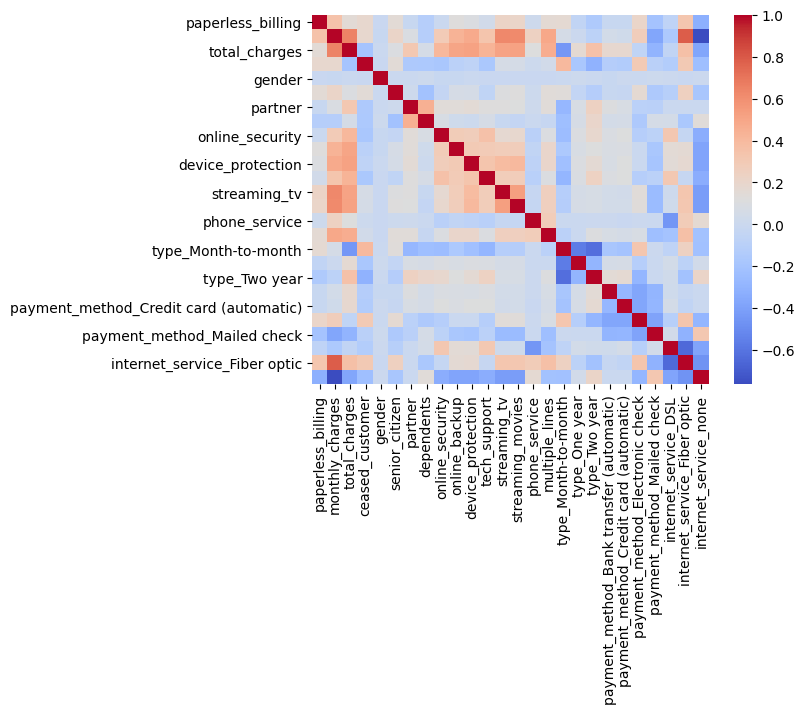

In [363]:
generaGraficaCorr(data)

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La visualización de la matriz de correlación permite una comprensión rápida de las relaciones entre variables, facilitando la detección de posibles redundancias o patrones relevantes para el modelado.</div>


#### Matriz de correlacion (Pearson)

In [364]:
matriz_correlacion = data.corr(method='pearson')

In [365]:
# Seleccionamos la columna 'variable_objetivo' para ver sus correlaciones con las demás
correlaciones_con_objetivo = matriz_correlacion['ceased_customer']

print("Correlación de cada característica con la variable objetivo:")
print(correlaciones_con_objetivo)

Correlación de cada característica con la variable objetivo:
paperless_billing                           0.191825
monthly_charges                             0.193356
total_charges                              -0.198324
ceased_customer                             1.000000
gender                                     -0.008612
senior_citizen                              0.150889
partner                                    -0.150448
dependents                                 -0.164221
online_security                            -0.171226
online_backup                              -0.082255
device_protection                          -0.066160
tech_support                               -0.164674
streaming_tv                                0.063228
streaming_movies                            0.061382
phone_service                               0.011942
multiple_lines                              0.040102
type_Month-to-month                         0.405103
type_One year                         

In [366]:
# Filtrando características basándose en un umbral
umbral = 0.05
caracteristicas_seleccionadas = correlaciones_con_objetivo[abs(correlaciones_con_objetivo) < umbral] #.index.tolist()

print(caracteristicas_seleccionadas)

gender           -0.008612
phone_service     0.011942
multiple_lines    0.040102
Name: ceased_customer, dtype: float64


#### Observaciones

Basado en el umbral, se opta por descartar las siguientes variables:

In [367]:
data = data.drop(["gender", 
                  #"online_backup", "device_protection",
                  #"streaming_tv", "streaming_movies",
#                  "phone_service", "multiple_lines",
                  #"payment_method_Mailed check"
                 ], axis = 1)
data = data.drop(["customer_id"], axis = 1)

In [368]:
data.duplicated().value_counts()

False    7002
True       41
dtype: int64

Normalized Class Frequency:
0    0.73463
1    0.26537
Name: ceased_customer, dtype: float64


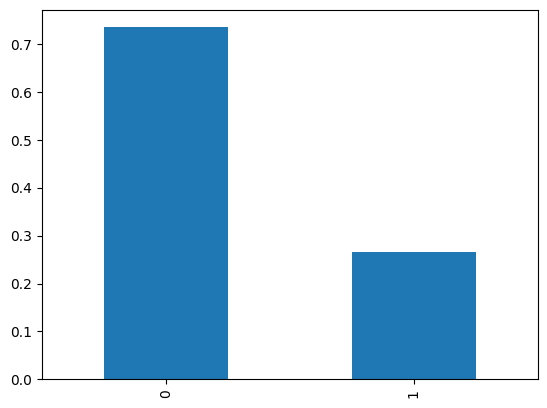

In [369]:
displayClassFrequency(data["ceased_customer"])

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El análisis de correlaciones está bien fundamentado y respalda la selección de variables, manteniendo un dataset depurado y equilibrado para el modelado.</div>


## Generación de un checkpoint

### Almacenamiento de la informacion

In [370]:
# Almacenando el avance del trabajo de tratamiento de los datos en un archivo como checkpoint
try:
    data.to_parquet('interconnect.parquet')
except Exception as e:
    print(e)

Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.


### Recuperación de la informacion

In [371]:
# Se recupera la informacion desde el archivo donde fue almacenado un checkpoint
try:
    data = pd.read_parquet('interconnect.parquet') 
except Exception as e:
    print(e)

Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.


## Segmentacion de datos

### Separacion de features y target

In [372]:
y = data['ceased_customer']
X = data.drop('ceased_customer', axis=1)

### Division de datos

In [373]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=10)

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La segmentación de datos y la separación de variables se realiza de forma ordenada, dejando listo el conjunto de entrenamiento y validación para el modelado.</div>


## Selección y Evaluación de Modelos

### Definicion de modelos

In [374]:
# Define the models
models = {
    'DummyClassifier': DummyClassifier(random_state=54321),
    'LogisticRegression': LogisticRegression(random_state=54321),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=54321),
    'RandomForestClassifier': RandomForestClassifier(random_state=54321),
    'LGBMClassifier': lgb.LGBMClassifier(objective='binary', random_state=54321),
    'CatBoost': CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', verbose=False, random_seed=54321)
}

# Define the grid parameters for each model
grid_params = {
    "LogisticRegression": {
        "solver": ["liblinear", "lbfgs", "newton-cg"]  
    },
    "DummyClassifier":{
        "strategy": ['most_frequent']
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 15, 20, 25, 30, 35, 40]
    },
    'RandomForestClassifier':{
        'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100],
        'class_weight': [None, 'balanced', 'balanced_subsample']
    },
    'LGBMClassifier': {
        'num_leaves': [30, 40], #  np.arange(20, 50, 10),  # Número de hojas en un árbol
        'learning_rate': [0.05],  # Tasa de aprendizaje
        'n_estimators': [150, 160, 170], #np.arange(50, 200, 50), # Número de árboles de refuerzo
        'max_depth': [-1, 5],  # Profundidad máxima del árbol (-1 significa sin límite)
        #'reg_alpha': [0, 0.1, 0.5, 1], # Regularización L1
        #'reg_lambda': [0, 0.1, 0.5, 1], # Regularización L2
        #'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], # Submuestreo de columnas al construir cada árbol
        #'subsample': [0.6, 0.7, 0.8, 0.9, 1.0] # Submuestreo de datos al construir cada árbol
    },
    'CatBoost': {
        'iterations': [100, 200],
        'learning_rate': [0.05],
        'depth': [4, 5, 6]
    }
}

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Buena definición del conjunto de modelos y configuración de grids, con atención al desbalance de clases para una evaluación rigurosa.</div>


### Evaluando modelos

#### Clase objetivo desbalanceada (Imbalanced)

Normalized Class Frequency:
0    0.73192
1    0.26808
Name: ceased_customer, dtype: float64


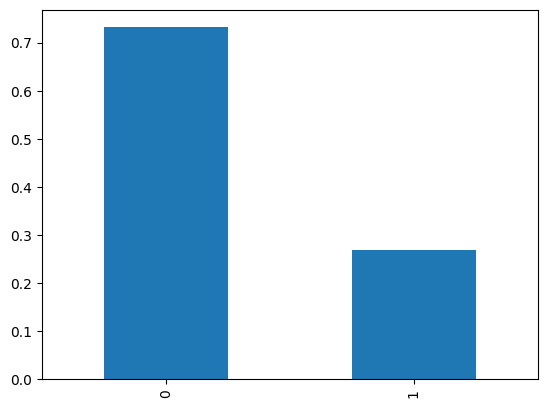

In [375]:
displayClassFrequency(y_train)

In [376]:
%%capture
the_best_model_dictionary = selectBestModel(X_train, y_train, "imbalanced")

In [377]:
print(the_best_model_dictionary)

{'strategy_label': 'imbalanced', 'best_estimator': <catboost.core.CatBoostClassifier object at 0x7f6572b521c0>, 'best_score': 0.8510806735827036, 'best_params': {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}}


In [378]:
model = the_best_model_dictionary["best_estimator"]
probabilities_one_train = model.predict_proba(X_train)[:, 1]
probabilities_one_valid = model.predict_proba(X_validation)[:, 1]
predicted_valid = model.predict(X_validation)

print("Precision score: {}".format(precision_score(y_validation, predicted_valid)))
print("Recall score:    {}".format(recall_score(y_validation, predicted_valid)))
print("F1 score:        {}".format(f1_score(y_validation, predicted_valid)))
print("ROC AUC Train score:   {}".format(roc_auc_score(y_train, probabilities_one_train)))
print("ROC AUC Test score:   {}".format(roc_auc_score(y_validation, probabilities_one_valid)))

Precision score: 0.6409574468085106
Recall score:    0.5320088300220751
F1 score:        0.5814234016887817
ROC AUC Train score:   0.8722915954241087
ROC AUC Test score:   0.8404646900378719


           train  test
Exactitud    NaN   NaN
F1          0.63  0.58
APS         0.72  0.65
ROC AUC     0.87  0.84


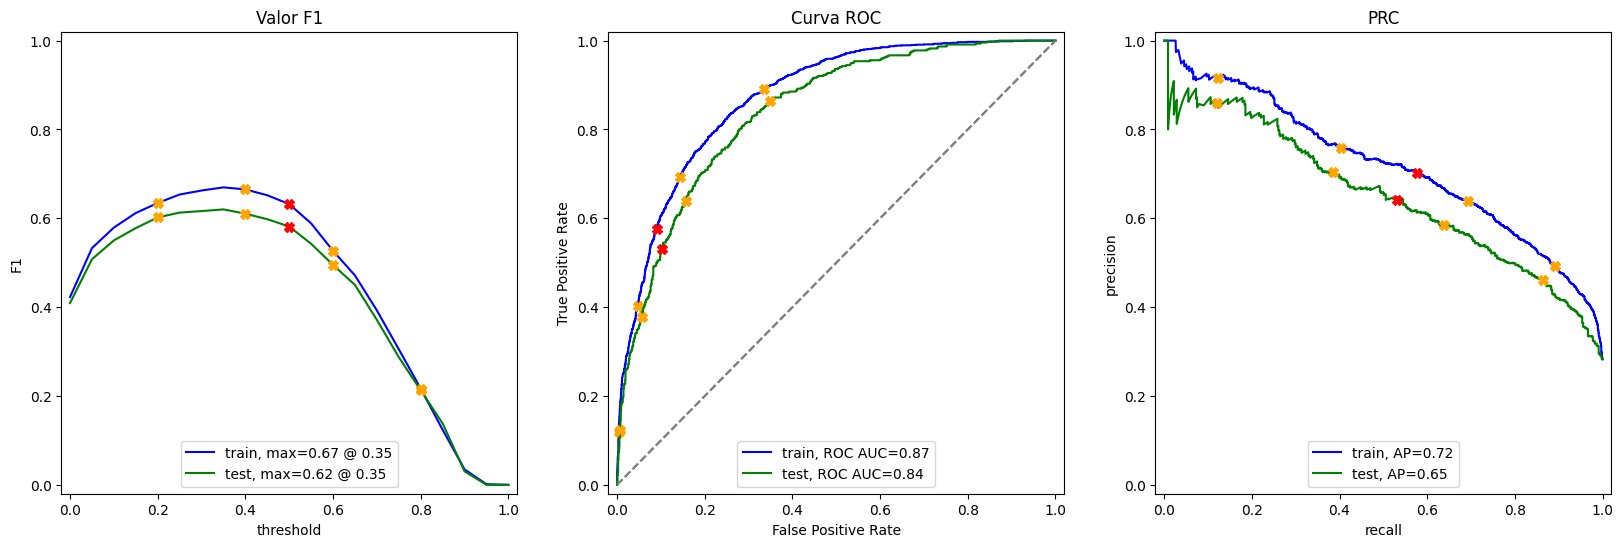

In [379]:
evaluate_model(model, X_train, y_train, X_validation, y_validation)

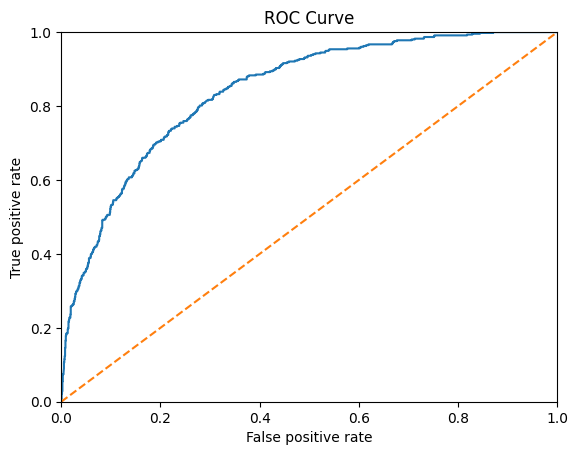

In [380]:
fpr, tpr, thresholds = roc_curve(y_validation, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

#### Balanceando clase objetivo (Oversampling)

In [381]:
X_train_upsampled, y_train_upsampled = generate_oversamples(
    X_train, y_train, 0
)

Normalized Class Frequency:
0    0.5
1    0.5
Name: ceased_customer, dtype: float64


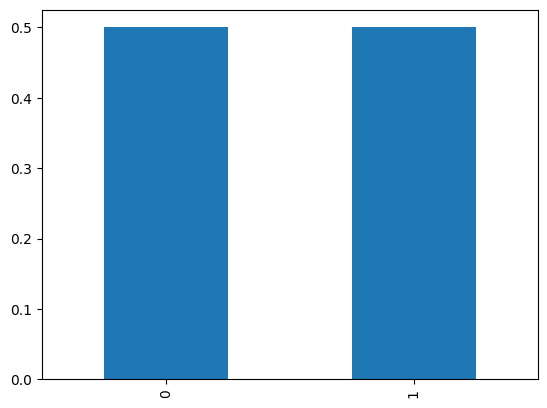

In [382]:
displayClassFrequency(y_train_upsampled)

In [383]:
%%capture
the_best_model_dictionary = selectBestModel(X_train_upsampled, y_train_upsampled, "oversampling")

In [384]:
print(the_best_model_dictionary)

{'strategy_label': 'oversampling', 'best_estimator': RandomForestClassifier(class_weight='balanced', random_state=54321), 'best_score': 0.9625341417375466, 'best_params': {'class_weight': 'balanced', 'n_estimators': 100}}


In [385]:
model = the_best_model_dictionary["best_estimator"]
probabilities_one_valid = model.predict_proba(X_validation)[:, 1]
predicted_valid = model.predict(X_validation)

print("Precision score: {}".format(precision_score(y_validation, predicted_valid)))
print("Recall score:    {}".format(recall_score(y_validation, predicted_valid)))
print("F1 score:        {}".format(f1_score(y_validation, predicted_valid)))
print("ROC AUC score:   {}".format(roc_auc_score(y_validation, probabilities_one_valid)))

Precision score: 0.5476190476190477
Recall score:    0.609271523178808
F1 score:        0.5768025078369906
ROC AUC score:   0.8090954965537261


           train  test
Exactitud    NaN   NaN
F1           1.0  0.58
APS          1.0  0.58
ROC AUC      1.0  0.81


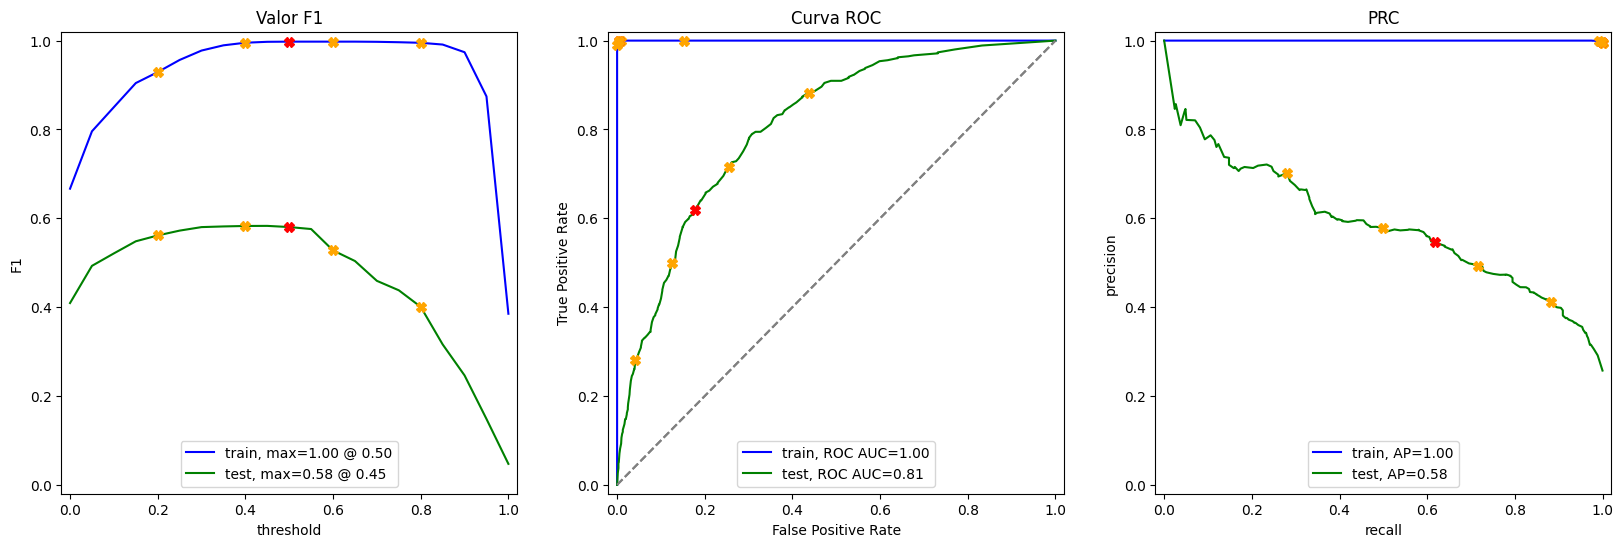

In [386]:
evaluate_model(model, X_train_upsampled, y_train_upsampled, X_validation, y_validation)

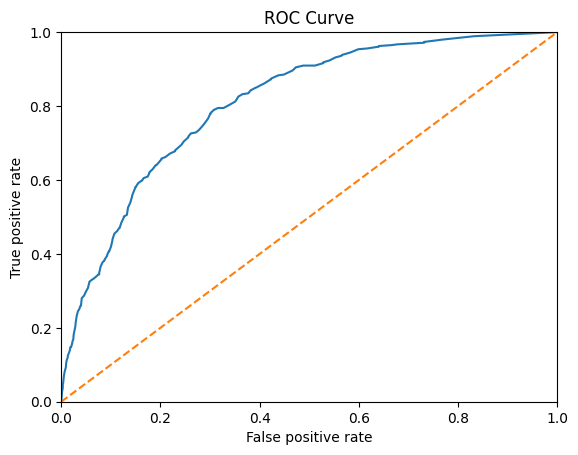

In [387]:
fpr, tpr, thresholds = roc_curve(y_validation, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La evaluación de modelos incluye tanto escenarios con clases desbalanceadas como balanceadas, aplicando métricas clave y comparando estrategias de forma estructurada para seleccionar la opción más robusta.</div>


## Conclusiones Generales

Para el problema de Interconect se ha solicitado maximizar la metrica ROC-AUC. Es importante tener una buen desempeño con el modelo para tratar de predecir (incluso con la metrica de precision) cuando un cliente es suceptible a cancelar el servicio con la empresa, de esta forma se pueden tomar medidas de retención de clientes y con ello reduccion de costos a largo plazo.

Este problema requirió un gran desarrollo en los diferentes aspectos para mejorar el desempeño de modelos. A continuación se describen las acciones que se llevaron a cabo durante el proceso siguiendo con el plan a partir de un primer EDA.

- Tratamiento de los datos (preprocesamiento). Se consideró la mejor calidad posible para los datos y llevandolos a una estandarizacion para la adecuada convivencia con los diferentes algoritmos disponibles.
- Se utilizó la tectnica de wrapping (RFE) para descartar o mantener caracteristicas, esto se hizo en varias iteraciones (combinaciones) lo que indicó que se tenia mayor beneficio para la metrica manteniendo la mayoria de las caracteristicas (basado en el umbral del coeficiente de correlacion).
- Balanceo de clase objetivo. Se optó por utilizar oversampling preservando los datos y aumentando las muestras de la clase minoritaria. Dentro de esto mismo se realizaron pruebas equilibrando pruebas o solo aumentando la clase minoritaria.
- Se probó tambien ajustando el tamaño del set de datos para validacion (35%-25%)
- En la evaluacion de modelos se incluyeron los siguientes algoritmos: RandomForest, LGBMClassifier, CatBoost y Regresión Logística, usando ROC-AUC como métrica. Se consideró CatBoost en el conjunto de algoritmos evaluados debido a que es de los que manejan bien el desbalance de clases y las características categóricas.
- Dentro de las pruebas se incluyó igualmente el ajuste de hiperparametros tratando de mediar entre el mejor resultado y la optimizacion del modelo debido al poder de computo y tiempo requeridos.

Como seleccion final de los modelos se encontro el siguiente bajo los datos desbalanceados (datos originales) y que arrojó un mejor equilibrio entre los datos de entrenamiento y de prueba:
- 'best_estimator': catboost.core.CatBoostClassifier
- ROC AUC Train score:   0.8722915954241087
- ROC AUC Test score:   0.8404646900378719
- 'best_params': {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}

Finalmente, puedo decir que fue un reto el explorar todas las aristas posibles para lograr el mejor rendimiento del modelo seleccionado.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Conclusión bien estructurada que resume el flujo completo del proyecto, destacando las decisiones clave y respaldando la elección final del modelo con métricas sólidas.</div>


## Comentario General del Revisor

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has desarrollado un flujo de trabajo completo y bien fundamentado que demuestra un dominio sólido en el tratamiento de datos, la exploración inicial, la preparación para el modelado y la evaluación de múltiples algoritmos.  

#### Puntos Positivos:

* **Procesamiento de datos:** Realizaste una limpieza exhaustiva, uniendo y transformando datasets de distintas fuentes con codificación consistente, control de valores nulos y creación precisa de la variable objetivo.
* **Análisis exploratorio:** Tu EDA fue minucioso, identificando patrones relevantes y variables clave, además de detectar y tratar valores atípicos o inconsistencias.
* **Ingeniería de características:** Lograste codificar adecuadamente variables categóricas y estandarizar las numéricas, dejando la matriz de datos lista para un desempeño óptimo de los modelos.
* **Estrategias para el desbalance de clases:** Implementaste tanto escenarios con datos originales como oversampling, comparando impactos y eligiendo la estrategia más coherente con el objetivo.
* **Evaluación de modelos:** Probaste múltiples algoritmos (RandomForest, LGBM, CatBoost, Regresión Logística, entre otros), afinaste hiperparámetros y seleccionaste el modelo con mejor equilibrio entre métricas y generalización, priorizando ROC-AUC.
* **Documentación y conclusiones:** El cierre del proyecto explica claramente las decisiones técnicas, el porqué de la elección final y cómo los resultados se alinean con los objetivos de negocio.

Has conseguido un pipeline robusto y replicable, con resultados consistentes tanto en entrenamiento como en validación, y un análisis que respalda cada decisión tomada. Este trabajo refleja un criterio analítico y técnico muy bien desarrollado. </div>


## Informe final del proyecto

### ¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?

- Se ejecutaron todos los pasos estipulados en el plan
- En cambio, se agregaron algunos apartados a dicho plan para mejorar la organizacion del workbook así como puntos en donde el analisis nos forzó a realizar medidas adicionales como la seccion de funciones/el manejo del checkpoint/manejo de seleccion de caracteristicas para mejorar el desempeño del modelo

### ¿Qué dificultades encontraste y cómo lograste resolverlas?

- Se implementaron los modelos basicos para un problema de clasificacion, sin embargo, no se conseguia el mejor rendimiento del modelo de acuerdo a la solicitud de negocio.

### ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?

- Se definieron algoritmos adicionales para generar el modelo.
- Se estuvo trabajando en la seleccion de caracteristicas, proporciones en la division de los datos y el manejo de hiperparametros.
- Manejo y/o revision del balanceo de la clase objetivo.

### ¿Cuál es tu modelo final y qué nivel de calidad tiene?

- ROC AUC Train score:   0.8722915954241087
- ROC AUC Test score:   0.8404646900378719